## Objective:
The objective of this data analysis project is to examine user data from the Waze app, a GPS and mapping service platform, to gain insights into the underlying reasons for high user churn. By conducting a thorough analysis, we aim to identify key factors influencing user churn, thereby enabling the development of effective strategies to mitigate churn rates and enhance user retention on the platform. The insights derived from this analysis will support data-driven decision-making and facilitate the implementation of targeted measures to improve user satisfaction and loyalty.

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset
df = pd.read_csv("waze_userdata.csv")
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [3]:
# Check Missing Values
print( df.isnull().sum() )

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64


Out of 14999 records, 700 records have 'label' missing values. Without label, we cannot identify whether a user is retained or churned. Hence, records without 'label' are of no use to us, we will drop them.

In [4]:
# Dropping Missing Values
df = df.dropna(subset=['label'])
df.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
# Checking Duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows: ", len(df[duplicate_rows]))

Number of duplicate rows:  0


In [6]:
# Dataset Description
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [7]:
# User Churn Ratio
total_count = len(df)
churned_count = len(df[ df["label"]=="churned" ])
retained_count = len(df[ df["label"]=="retained" ])

# Get percentages of churn vs. retained
print("Retained %:",round(100*retained_count/total_count,1))
print("Churned %:",round(100*churned_count/total_count,1))

Retained %: 82.3
Churned %: 17.7


From the given dataset, possible reason of users leaving:
1) Since app is used by both Android and iPhone users, there is possibility that the app on one of these platforms delivers a poor experience causing users to churn

In [8]:
# Android
df_android = df[ df["device"]=="Android" ]
total_count_android = len(df_android)
churned_count_android = len(df_android[ df_android["label"]=="churned" ])
retained_count_android = len(df_android[ df_android["label"]=="retained" ])
print("Android Retained %:",round(100*retained_count/total_count,1))
print("Android Churned %:",round(100*churned_count/total_count,1))

# iPhone
df_iphone = df[ df["device"]=="iPhone" ]
total_count_iphone = len(df_iphone)
churned_count_iphone = len(df_iphone[ df_iphone["label"]=="churned" ])
retained_count_iphone = len(df_iphone[ df_iphone["label"]=="retained" ])
print("iPhone Retained %:",round(100*retained_count/total_count,1))
print("iPhone Churned %:",round(100*churned_count/total_count,1))

Android Retained %: 82.3
Android Churned %: 17.7
iPhone Retained %: 82.3
iPhone Churned %: 17.7


Churn vs Retained user distribution is uniform across both platforms. Hence the above assumption is proven incorrect.
Now, We will plot histograms for churned users and try to observe the trends.

In [19]:
# Function to plot Boxplot and Histogram
def plotForChurnedUsers(df_start, columnName):
    print("Report for",columnName)
    df = df_start[df_start["label"]=="churned"]
    df[columnName].hist()
    plt.show()

Report for drives


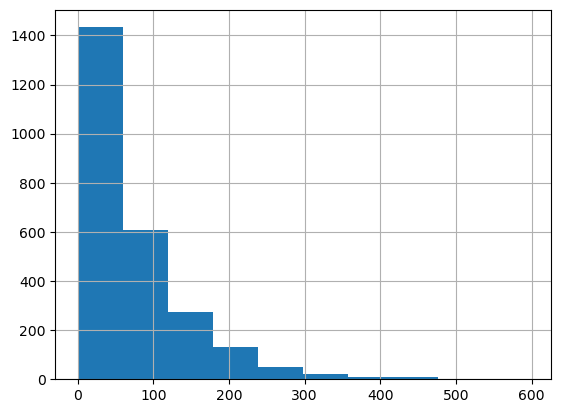

In [22]:
plotForChurnedUsers(df, "drives")

Report for total_sessions


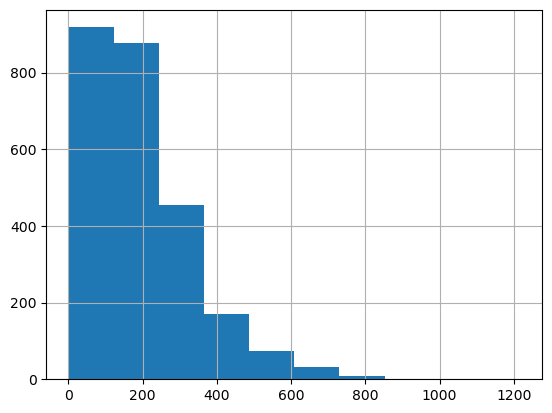

In [23]:
plotForChurnedUsers(df, "total_sessions")

Report for driven_km_drives


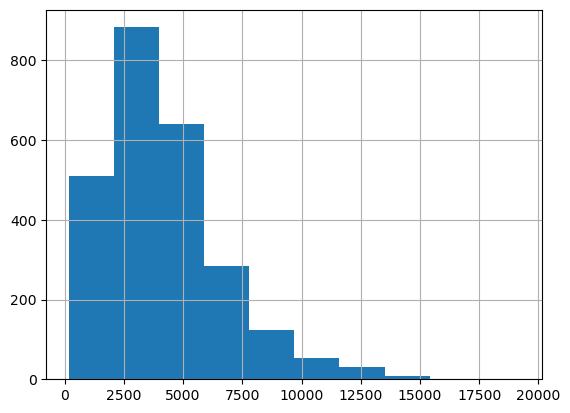

In [24]:
plotForChurnedUsers(df, "driven_km_drives")

Report for driving_days


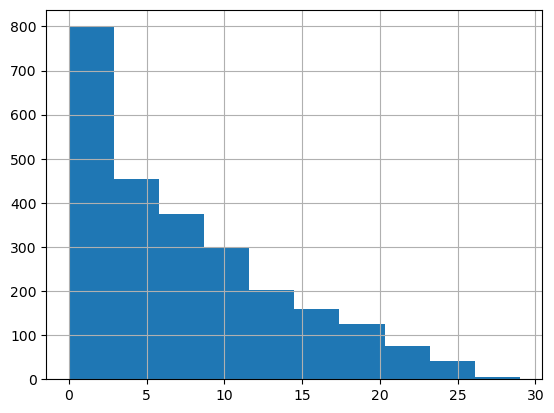

In [25]:
plotForChurnedUsers(df, "driving_days")

We will create a new feature for Kilometer per driving day

In [29]:
df["km_per_driving_day"] = df["driven_km_drives"]/df["driving_days"]
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,1.429900e+04
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,inf
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,NaN
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,1.675616e+02
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,3.241789e+02
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,7.608293e+02
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


Report for km_per_driving_day


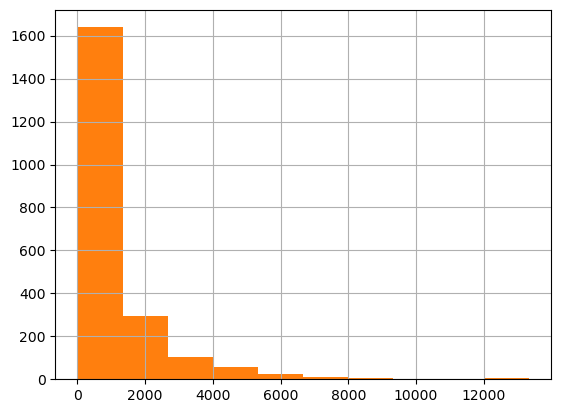

In [31]:
plotForChurnedUsers(df[df['km_per_driving_day']!=float('inf') ], "km_per_driving_day")

In the plot we can see many users drive more than 2000 kms per day, which is not practical.
Hence outliers need to be removed.

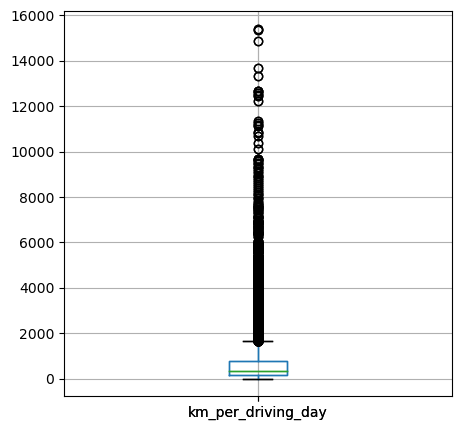

In [33]:
# Plotting Boxplot
df_cleaned = df[df['km_per_driving_day']!=float('inf') ]

df_temp = pd.DataFrame(df["km_per_driving_day"])
boxplot = df_temp.boxplot(figsize = (5,5))
plt.show()

In [38]:
# Removing Outliers
Q1 = df_cleaned['km_per_driving_day'].quantile(0.25)
Q3 = df_cleaned['km_per_driving_day'].quantile(0.75)
IQR = Q3 - Q1

upper_extreme = Q3 + 1.5 * IQR
lower_extreme = Q1 - 1.5 * IQR

print("Extremes: ",lower_extreme," - ",upper_extreme)

df_outliers = df_cleaned[(df_cleaned["km_per_driving_day"] > upper_extreme) | (df_cleaned["km_per_driving_day"] < lower_extreme)]

print("Number of Outliers :",len(df_outliers))

df_cleaned = df_cleaned[(df_cleaned["km_per_driving_day"] <= upper_extreme) & (df_cleaned["km_per_driving_day"] >= lower_extreme)]
df_cleaned.head(5)

Extremes:  -491.22714897288074  -  1243.2425484337284
Number of Outliers : 1499


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791


Report for km_per_driving_day


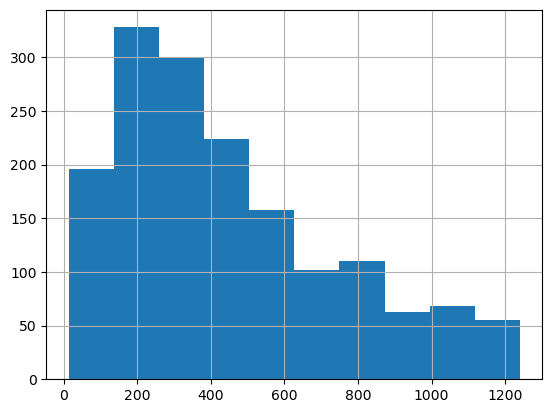

In [39]:
# Plotting Histogram again
plotForChurnedUsers(df_cleaned, "km_per_driving_day")

We will divide the dataset into 2 parts: churned and retained.
Then we will then analyse the two datasets separately.

In [45]:
# Saving the cleaned dataframe as CSV for Tableau visualizations
df_cleaned.to_csv('file1.csv')

df_retained = df_cleaned[ df_cleaned["label"]=="retained" ]
df_churned = df_cleaned[ df_cleaned["label"]=="churned" ]

In [51]:
print("For Retained Users:")
print("drives Mean",df_retained['drives'].mean())
print("drives Median",df_retained['drives'].median())

print("For Churned Users:")
print("drives Mean",df_churned['drives'].mean())
print("drives Median",df_churned['drives'].median())

print("Difference in Mean %: ",(100*(df_retained['drives'].mean()-df_churned['drives'].mean())/df_retained['drives'].mean()))
print("Difference in Median %: ",(100*(df_retained['drives'].median()-df_churned['drives'].median())/df_retained['drives'].median()))


For Retained Users:
drives Mean 66.71911102408458
drives Median 48.0
For Churned Users:
drives Mean 73.39862757330006
drives Median 51.0
Difference in Mean %:  -10.011399202852498
Difference in Median %:  -6.25


For churned vs retained users, there is not much difference in number of drives

In [52]:
print("For Retained Users:")
print("driven_km_drives Mean",df_retained['driven_km_drives'].mean())
print("driven_km_drives Median",df_retained['driven_km_drives'].median())

print("For Churned Users:")
print("driven_km_drives Mean",df_churned['driven_km_drives'].mean())
print("driven_km_drives Median",df_churned['driven_km_drives'].median())

print("Difference in Mean %: ",(100*(df_retained['driven_km_drives'].mean()-df_churned['driven_km_drives'].mean())/df_retained['driven_km_drives'].mean()))
print("Difference in Median %: ",(100*(df_retained['driven_km_drives'].median()-df_churned['driven_km_drives'].median())/df_retained['driven_km_drives'].median()))


For Retained Users:
driven_km_drives Mean 3846.4548891425457
driven_km_drives Median 3316.8268639999997
For Churned Users:
driven_km_drives Mean 3683.298930903369
driven_km_drives Median 3221.301934
Difference in Mean %:  4.241722909573686
Difference in Median %:  2.8800095367293066


In [53]:
print("For Retained Users:")
print("km_per_driving_day Mean",df_retained['km_per_driving_day'].mean())
print("km_per_driving_day Median",df_retained['km_per_driving_day'].median())

print("For Churned Users:")
print("km_per_driving_day Mean",df_churned['km_per_driving_day'].mean())
print("km_per_driving_day Median",df_churned['km_per_driving_day'].median())

print("Difference in Mean %: ",(100*(df_retained['km_per_driving_day'].mean()-df_churned['km_per_driving_day'].mean())/df_retained['km_per_driving_day'].mean()))
print("Difference in Median %: ",(100*(df_retained['km_per_driving_day'].median()-df_churned['km_per_driving_day'].median())/df_retained['km_per_driving_day'].median()))

For Retained Users:
km_per_driving_day Mean 323.5955483431221
km_per_driving_day Median 246.1345648131868
For Churned Users:
km_per_driving_day Mean 446.96529074648777
km_per_driving_day Median 370.6771799090909
Difference in Mean %:  -38.1246723062307
Difference in Median %:  -50.59940085636914


## Conclusion-
As we can see, difference in mean and median for total kms driven and total number of drives is small (between 4-10%)
But in case of kms per day, the difference is very large (40-50%)

This shows that churned users cover about 40% more distance per day. The mean kms driven per day is 446 kms.
Regular people do not drive an average of 400-500 kms per day. 
Hence, we can say that professional drivers (for example: truck drivers) who cover lot of distance per day are more likely to churn.
This maybe because they have some special feature requirement, which the Waze app does not cover.

## Tableau Visualization

In [54]:
from IPython.display import HTML
myhtml = HTML("""<div class='tableauPlaceholder' id='viz1691349550929' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Wa&#47;WazeDataAnalysis&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='WazeDataAnalysis&#47;Story1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Wa&#47;WazeDataAnalysis&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1691349550929');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='1014px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>""") #make the html object
myhtml